# Clustering Model
This notebook contains a clustering model of the artists and song lyrics. 


In [244]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
import re
from bs4 import BeautifulSoup             
import squarify
from yellowbrick.cluster import InterclusterDistance

In [211]:
lyrics = pd.read_csv('./all_lyrics.csv')
lyrics.head()

,artist_name,lyrics,billboard_genre,clean_lyrics
0,Selena Gomez,You promised the world and I fell for it\nI pu...,pop,you promised the world and i fell for it i put...
1,​The Lumineers,"Ah, ah, when I was younger\nI, I should've kno...",folk_americana,ah ah when i was younger i i should ve known b...
2,Simon & Garfunkel,"Hello darkness, my old friend\nI've come to ta...",folk_americana,hello darkness my old friend i ve come to talk...
3,Mumford & Sons,Heto mi halanma\nMine waddimi yiddema\nKo ane ...,folk_americana,heto mi halanma mine waddimi yiddema ko ane ta...
4,Lord Huron,I am not the only traveler\nWho has not repaid...,folk_americana,i am not the only traveler who has not repaid ...


### Preprocessing

In [295]:
cv = CountVectorizer(stop_words='english', min_df=5)
cv.fit(lyrics['clean_lyrics'])

lyrics_vec = cv.transform(lyrics['clean_lyrics'])
lyrics_df = pd.DataFrame(lyrics_vec.todense(), columns=cv.get_feature_names())

# Use K-means to cluster

In [331]:
#intstantiate model
km = KMeans(n_clusters=5)
km.fit(lyrics_vec)

KMeans(n_clusters=5)

In [332]:
km.cluster_centers_

array([[ 0.64705882,  0.17647059,  0.11764706, ...,  0.29411765,
         0.17647059,  0.17647059],
       [ 0.        ,  0.        ,  1.        , ...,  2.        ,
         5.        , 21.        ],
       [ 2.        ,  0.33333333,  0.        , ...,  0.66666667,
         1.66666667,  3.66666667],
       [ 1.66666667,  0.        ,  1.        , ...,  4.33333333,
         0.        ,  3.        ],
       [ 0.        ,  0.15384615,  0.07692308, ...,  1.07692308,
         0.        ,  0.76923077]])

In [333]:
km.labels_

array([4, 0, 0, 0, 0, 0, 0, 4, 3, 0, 4, 4, 4, 0, 2, 0, 0, 4, 4, 4, 2, 0,
       0, 0, 3, 2, 4, 0, 1, 4, 4, 4, 0, 0, 3, 0, 4], dtype=int32)

In [334]:
lyrics['cluster'] = km.labels_

In [335]:
lyrics.sort_values('cluster')

,artist_name,lyrics,billboard_genre,clean_lyrics,cluster
13,Kacey Musgraves,"When it rains, it pours\nBut you didn't even n...",folk_americana,when it rains it pours but you didn t even not...,0
23,Lizzo,Why men great 'til they gotta be great?\nWoo!\...,pop,why men great til they gotta be great woo i ju...,0
22,John Mayer,"Ah, ah, ah\nAh...\n\nI'm the boy in your other...",folk_americana,ah ah ah ah i m the boy in your other phone li...,0
21,Chris Stapleton,Used to spend my nights out in a barroom\nLiqu...,folk_americana,used to spend my nights out in a barroom liquo...,0
35,Jack Johnson,Can't you see that it's just raining?\nThere a...,folk_americana,can t you see that it s just raining there ain...,0
16,Hozier,My lover's got humor\nShe's the giggle at a fu...,folk_americana,my lover s got humor she s the giggle at a fun...,0
15,Leon Bridges,Been travelling these wide roads\nFor so long\...,folk_americana,been travelling these wide roads for so long m...,0
32,KALEO,"Oh, father, tell me, do we get what we deserve...",folk_americana,oh father tell me do we get what we deserve oh...,0
33,Tyler Childers,Well my buckle makes impressions\nOn the insid...,folk_americana,well my buckle makes impressions on the inside...,0
27,Khalid,So you're still thinking of me\nJust like I kn...,pop,so you re still thinking of me just like i kno...,0


# How close are the clusters?
Intercluster distance maps display an embedding of the cluster centers in 2 dimensions with the distance to other centers preserved. E.g. the closer to centers are in the visualization, the closer they are in the original feature space. The clusters are sized according to a scoring metric. By default, they are sized by membership, e.g. the number of instances that belong to each center. This gives a sense of the relative importance of clusters. Note however, that because two clusters overlap in the 2D space, it does not imply that they overlap in the original feature space.

Source: https://www.scikit-yb.org/en/latest/api/cluster/icdm.html?highlight=intercluster

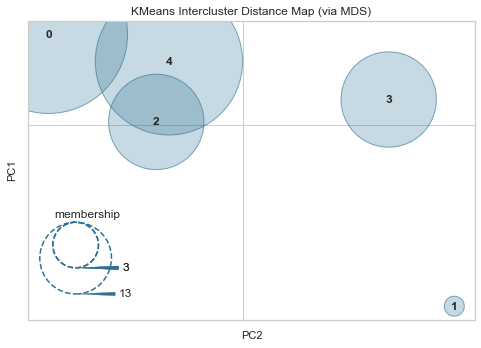

In [336]:
# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(km)

visualizer.fit(lyrics)        # Fit the data to the visualizer
visualizer.show();        # Finalize and render the figure


From here we can see Drake (1) is vastly different from the rest of the artists.

# How similar are the lyrics of the top artists for each genre?

In [360]:
def plot_clusters_artists(genre, genre_title):
    df = pd.DataFrame(lyrics[lyrics['billboard_genre'] == genre][['cluster']].value_counts(normalize=True).reset_index())
    
    squarify.plot(sizes=df[0], label=df['cluster'], alpha=.7,color=['lightcyan','lightgreen','yellow','grey','orange'])
    plt.axis('off')
    plt.title(f'Percentage of Clusters for {genre_title} Artists', size=16)
    plt.show()

    return None

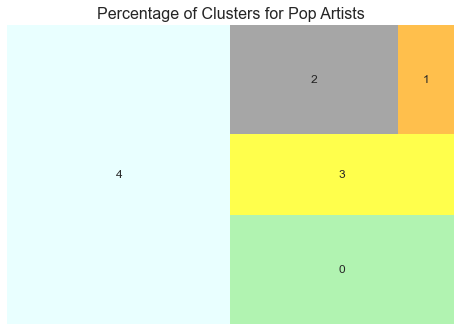

<Figure size 576x396 with 0 Axes>

In [361]:
plot_clusters_artists('pop','Pop')
plt.savefig('./imgs/pop_cluster.jpeg',bbox_inches='tight');

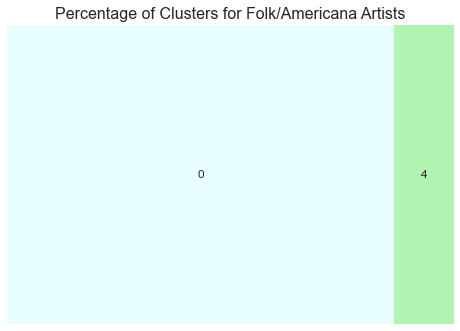

<Figure size 576x396 with 0 Axes>

In [362]:
plot_clusters_artists('folk_americana', 'Folk/Americana')
plt.savefig('./imgs/folk_cluster.jpeg',bbox_inches='tight');

# Cluster John Mayer's songs

In [341]:
songs = pd.read_csv('./all_songs.csv')

In [342]:
#create a dataframe of just John Mayer songs
john_mayer = songs[songs['artist_name'] == 'John Mayer']
john_mayer.head()

,artist_name,image_url,url,title,lyrics,spotify_url,billboard_genre,clean_lyrics
2730,John Mayer,https://images.genius.com/4c443bf06bf6b696ad4f...,https://genius.com/artists/John-mayer,New Light,"Ah, ah, ah\nAh...\n\nI'm the boy in your other...",https://open.spotify.com/track/3bH4HzoZZFq8UpZ...,folk_americana,ah ah ah ah i m the boy in your other phone li...
2731,John Mayer,https://images.genius.com/4c443bf06bf6b696ad4f...,https://genius.com/artists/John-mayer,Gravity,Gravity is working against me\nAnd gravity wan...,https://open.spotify.com/track/52K3qt1rCYf3Ciu...,folk_americana,gravity is working against me and gravity want...
2732,John Mayer,https://images.genius.com/4c443bf06bf6b696ad4f...,https://genius.com/artists/John-mayer,Slow Dancing in a Burning Room,It's not a silly little moment\nIt's not the s...,https://open.spotify.com/track/3f8Uygfz3CIpUCo...,folk_americana,it s not a silly little moment it s not the st...
2733,John Mayer,https://images.genius.com/4c443bf06bf6b696ad4f...,https://genius.com/artists/John-mayer,Free Fallin’,"She's a good girl, loves her mama\nLoves Jesus...",https://open.spotify.com/track/4LloVtxNZpeh7q7...,folk_americana,she s a good girl loves her mama loves jesus a...
2734,John Mayer,https://images.genius.com/4c443bf06bf6b696ad4f...,https://genius.com/artists/John-mayer,In the Blood,How much of my mother has my mother left in me...,https://open.spotify.com/track/77Y57qRJBvkGCUw...,folk_americana,how much of my mother has my mother left in me...


In [344]:
cv_jm = CountVectorizer(stop_words='english', min_df=5)
cv_jm.fit(john_mayer['clean_lyrics'])

lyrics_vec_jm = cv.transform(john_mayer['clean_lyrics'])
lyrics_df_jm = pd.DataFrame(lyrics_vec_jm.todense(), columns=cv.get_feature_names())

In [347]:
#intstantiate model
km_jm = KMeans(n_clusters=3)
km_jm.fit(lyrics_vec_jm)


KMeans(n_clusters=3)

In [349]:
john_mayer['cluster'] = km_jm.labels_

/Users/joshuamizraji/anaconda3/envs/personal/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


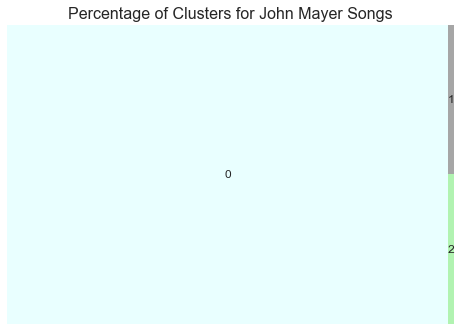

In [365]:
df_john_mayer = pd.DataFrame(john_mayer[['cluster']].value_counts(normalize=True).reset_index())

squarify.plot(sizes=df_john_mayer[0], label=df_john_mayer['cluster'], alpha=.7, color=['lightcyan','lightgreen','grey'])
plt.axis('off')
plt.title(f'Percentage of Clusters for John Mayer Songs', size=16)
plt.savefig('./imgs/john_mayer_cluster.jpeg',bbox_inches='tight');

In [355]:
#what is cluster 1?
john_mayer[john_mayer['cluster'] == 1]

,artist_name,image_url,url,title,lyrics,spotify_url,billboard_genre,clean_lyrics,cluster
2767,John Mayer,https://images.genius.com/4c443bf06bf6b696ad4f...,https://genius.com/artists/John-mayer,Say,Take all of your wasted honor\nEvery little pa...,NaN,folk_americana,take all of your wasted honor every little pas...,1


In [358]:
#what is cluster 2?
john_mayer[john_mayer['cluster'] == 2]

,artist_name,image_url,url,title,lyrics,spotify_url,billboard_genre,clean_lyrics,cluster
2855,John Mayer,https://images.genius.com/4c443bf06bf6b696ad4f...,https://genius.com/artists/John-mayer,Wanna Be Startin’ Somethin’,I said you want to be starting something\nYou ...,NaN,folk_americana,i said you want to be starting something you g...,2


It would make sense that "Wanna Be Startin' Somethin'" is in this list because it is not an original John Mayer song. "Say" repeats the same lyrics for the whole song, which is why I believe this ended up in it's own cluster.